<a href="https://colab.research.google.com/github/alejandrolq/Labs-Text-Mining-Image-Recognition/blob/main/Algoritmo_Canny_Jose_Lopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre: José Alejandro López Quel**

**Carné: 21001127**

**Text Mining & Image Recognition**

**Sección U**

**Laboratorio Canny**

In [65]:
import numpy as np
import math
import cv2 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [66]:
img = cv2.imread('carro.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

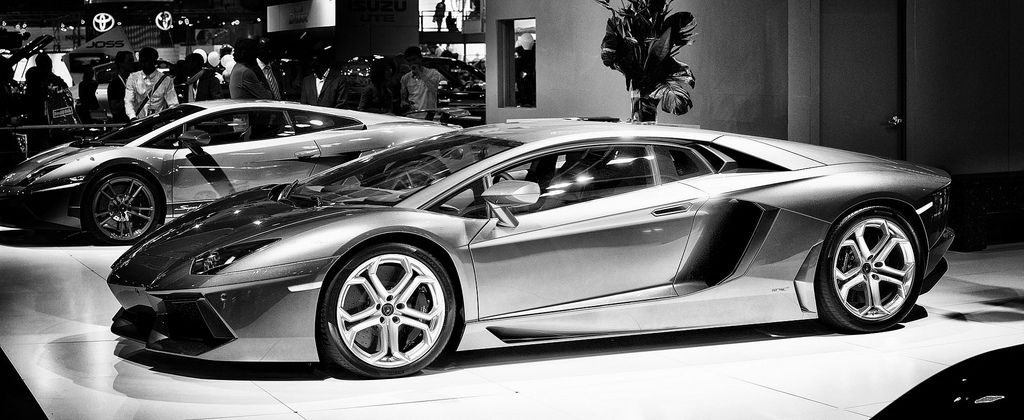

In [67]:
cv2_imshow(img)

In [25]:
img.shape

(420, 1024)

In [68]:
def derivadaX(img):
  return np.diff(img, axis=1)

In [69]:
def derivadaY(img):
  return np.diff(img, axis=0)

In [93]:
def magnitud(dx, dy):
  return np.float32(np.sqrt(np.power(dx, 2) + np.power(dy, 2)))

In [100]:
def fase(dx, dy):
  return np.float32(np.arctan2(dy, dx)* 180 / np.pi)

In [105]:
def convolutional_filter(imagen, kernel):
    alto = imagen.shape[0]
    ancho =  imagen.shape[1]
    
    altoKernel = len(kernel[:,0])
    anchoKernel = len(kernel[0,:])

    #parte entera del centro del kernel
    step = int(len(kernel[0,:])/2)

    newImg = np.zeros((alto, ancho, 1))
    
    for i in range(step, alto - step):
        newPixel = 0
        for j in range(step, ancho - step):
            ventana = imagen[i-step:i+2*step, j-step:j+2*step]
            newPixel = 0
            for m in range(0, altoKernel):
                for n in range(0, anchoKernel):
                    newPixel = newPixel + ventana[m, n] * kernel[m, n]
            newImg[i, j] = int(newPixel)
    
    return newImg

In [106]:
kernel = np.array([[1/16., 2/16., 1/16.], [2/16., 4/16., 2/16.], [1/16., 2/16., 1/16.]])
img_fg = convolutional_filter(img, kernel)

In [81]:
x,y = img.shape

In [107]:
dx = derivadaX(img_fg)
dy = derivadaY(img_fg)
magnitud_ = magnitud(dx[:x-1,:y-1], dy[:x-1,:y-1])
fase_ = fase(dx[:x-1,:y-1], dy[:x-1,:y-1])

In [102]:
dx_ = cv2.GaussianBlur(dx,(3,3),0)
dy_ = cv2.GaussianBlur(dy,(3,3),0)
magnitud__ = cv2.GaussianBlur(magnitud_,(3,3),0)
fase__ = cv2.GaussianBlur(fase_,(3,3),0)

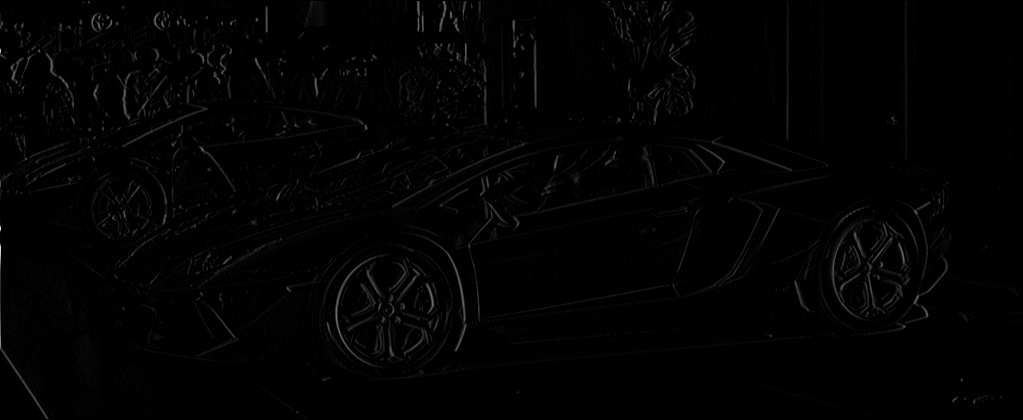

In [109]:
cv2_imshow(dx)

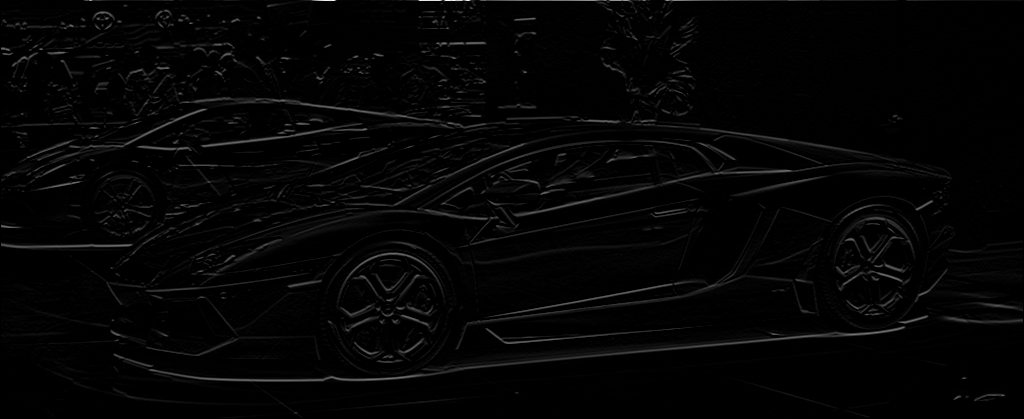

In [110]:
cv2_imshow(dy)

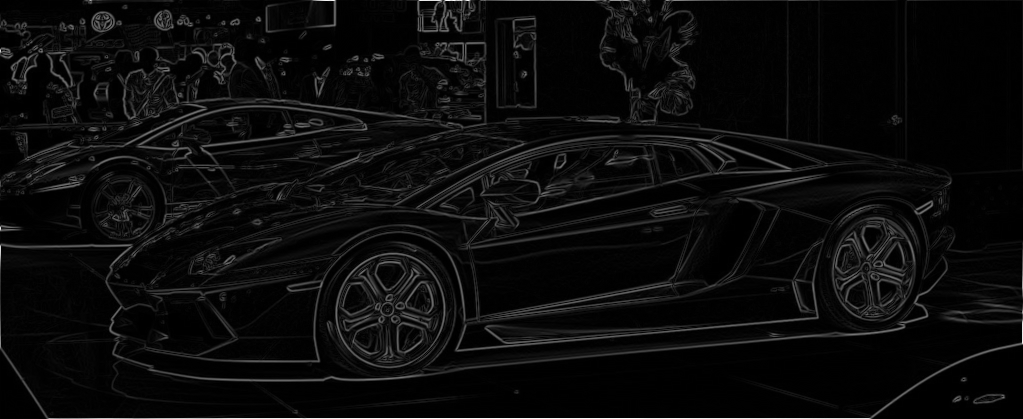

In [111]:
cv2_imshow(magnitud_)

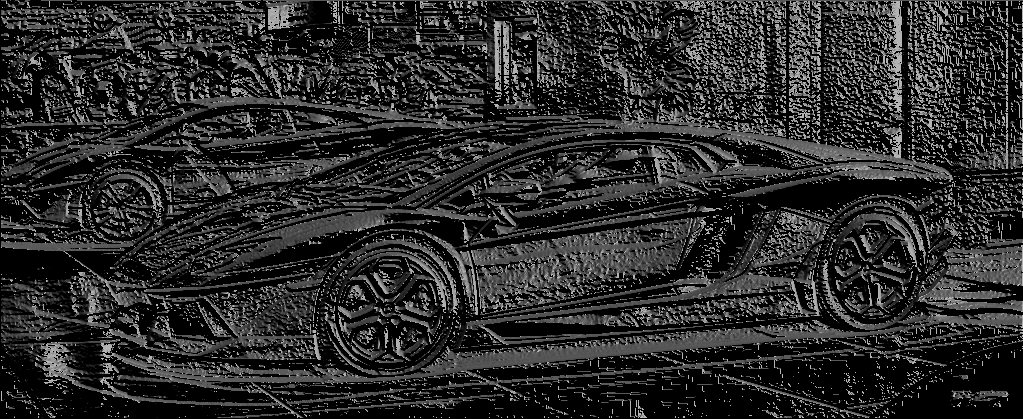

In [112]:
cv2_imshow(fase_)

In [117]:
def non_maximum_suppression(magImage, phaseImage):
  alto = magImage.shape[0]
  ancho =  magImage.shape[1]

  newImg = np.zeros((alto, ancho,1))
  val1 = 0
  val2 = 0
  val3 = 0
  alpha = 0.1

  for i in range(1, alto - 2):
    for j in range(1, ancho - 2):
      ventana = magImage[i-1:i+2, j-1:j+2]
      angulo = phaseImage[i, j]
      vDerecha = magImage[i - 1, j]
      vIzquierda = magImage[i + 1, j]

      if (((angulo > 337)  or (angulo <= 23)) or ((angulo >= 157) and (angulo <= 203))):
        val1 = ventana[1,0]
        val2 = ventana[1,1]
        val3 = ventana[1,2]
      elif (((angulo > 23) and (angulo <= 67)) or ((angulo > 203) and (angulo <= 248))):
        val1 = ventana[0,2]
        val2 = ventana[1,1]
        val3 = ventana[2,0]
      elif (((angulo > 67) and (angulo <= 113)) or ((angulo > 248) and (angulo <= 293))):
        val1 = ventana[0,1]
        val2 = ventana[1,1]
        val3 = ventana[2,1]
      elif (((angulo > 293) and (angulo <= 337)) or ((angulo > 113) and (angulo <= 157))):
        val1 = ventana[0,0]
        val2 = ventana[1,1]
        val3 = ventana[2,2]
      
      if ((val2 >= val1) and (val2 >= val3)):
        newImg[i, j] = val2 
        #newImg[i,j] = alpha*val1 + (1-alpha)*val3
        #newImg[i, j] = 255
      else:
          newImg[i, j] = 0     
  return newImg

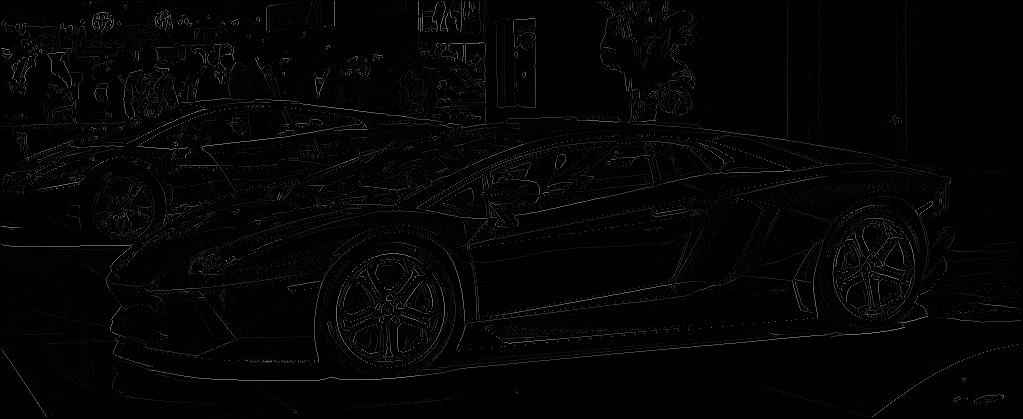

In [119]:
nms = non_maximum_suppression(magnitud_, fase_)
cv2_imshow(nms)

In [126]:
def threshold(img):
  alto = img.shape[0] 
  ancho = img.shape[1]
  newImg = np.zeros((alto, ancho, 1))
  for i in range(0, alto):
    for j in range(0, ancho):
      if (img[i,j] > 12):
        newImg[i,j] = 255
      else:
        newImg[i,j] = 0
  return newImg

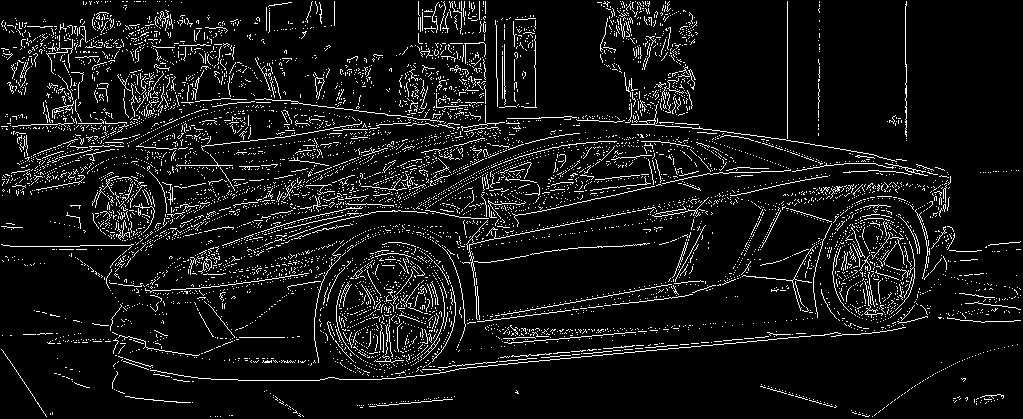

In [127]:
imgCanny = threshold(nms)
cv2_imshow(imgCanny)

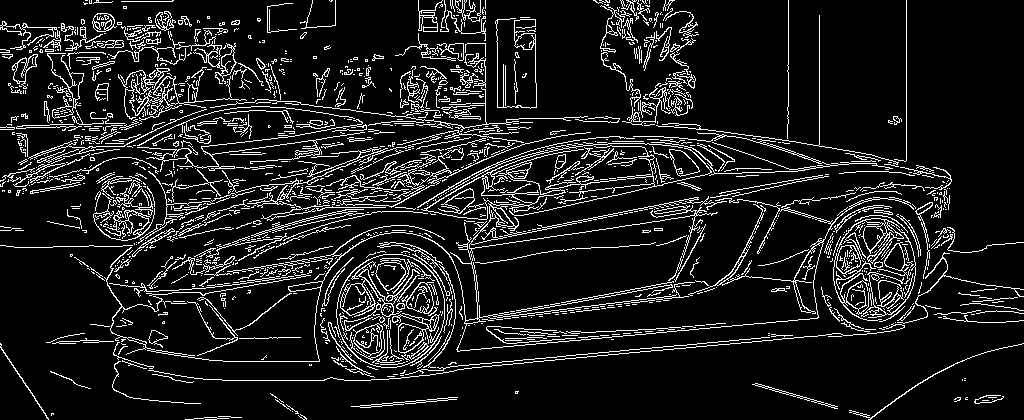

In [128]:
edges = cv2.Canny(img, 100, 200)
cv2_imshow(edges)